# 1. Package Google Play Store Review

In order to get data from Google Play Store, we need to install Google Play Scrapper and import several package.

In [1]:
pip install google-play-scraper -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Google Scrapper Package
from google_play_scraper import app

# Import General Package
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import numpy
import string
import matplotlib.pyplot as plt

# Import Tokenize Package
from nltk.tokenize import word_tokenize

# Import Datetime package
import datetime as dt

# 2. Grabbing Data Mobile Apps from Play Store

Data Gathering is executed by scraping Mobile Application Review from Google Play Store. However, to avoid any difference between data and mini report, researchers used the CSV exported from data scraping.

from google_play_scraper import Sort, reviews_all

mobile_apps_review = reviews_all( 
    'com.sainsburys.gol', # You can replace based on mobile apps that you want to review 
    sleep_milliseconds=0, # defaults to 0 lang='en', # defaults to 'en' 
    country='us', # defaults to 'us' 
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT )

In [3]:
# Creating Data Frame from the scrapper.
df_mobile_apps_review = pd.read_csv (r'sainsbury_data_6_november_2022_FINAL_PYTHON.csv', sep=',', encoding="utf8")
df_mobile_apps_review = pd.DataFrame (df_mobile_apps_review)

In [4]:
# Moreover, we dropping fields which are not used in this business case.
df_mobile_apps_review = df_mobile_apps_review.drop(['userName','userImage','replyContent','repliedAt'],axis=1)
df_mobile_apps_review['content'] = df_mobile_apps_review['content'].astype(str)
df_mobile_apps_review['at']= pd.to_datetime(df_mobile_apps_review['at'])

In [5]:
# Function to Create 'Score' Histogram

def review_score_histogram(data_name, figure_title):
    plt.style.use ('bmh')
    data_name.value_counts().sort_index().plot (kind='bar', title = figure_title,
                                                               figsize =(5,5), color='#00ABB3')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.xlabel('Review Score')
    plt.ylabel ('Total Review')
    plt.show()

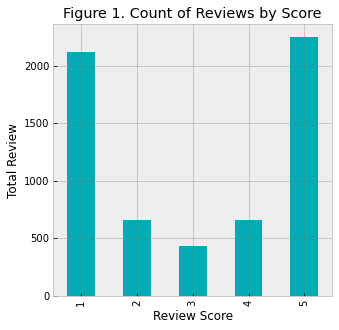

In [6]:
review_score_histogram (df_mobile_apps_review['score'], 'Figure 1. Count of Reviews by Score')

# 3. Data Cleaning/Processing

Data cleaning processes are carried out before the review content is analysed, including the removal of numbers, punctuation, individual letters, stopwords, and several unique values.

In [7]:
# Criteria For Removal

# Numbers
numbers_1_to_100 = [str(integer) for integer in range(101)] # Numbers

# Punctuation
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,']

# Individual Letters
individual_letters_lowercase = list(string.ascii_lowercase)
individual_letter_uppercase = list(string.ascii_uppercase)

# Stopwords
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Several Unique Values
some_more_tokens_to_remove = [ 'rs', 'per', 'would','one','two','first'
                             '000',  '00',  'co', 'ditto', '1st', 'ii', 
                             'total', 'number', 'year', 'years', 'the', 'of',
                             'in', 'on', '13', 'i', 'you', 'we', 'they', 'me', 'us', 'other', 'app']
    
# Compile All Criteria
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
                + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters_lowercase + 
                individual_letter_uppercase +some_more_tokens_to_remove + stop_words)

In [8]:
# Function to tokenize without Post Tagging Process

def tokenize_type_combined (data_set_name):
    tagged_reviews_tokens=[]
    for text in data_set_name:
        tagged_reviews_tokens = tagged_reviews_tokens + word_tokenize(text)
        
    return tagged_reviews_tokens

In [9]:
tokenize_type_combined_data = tokenize_type_combined (df_mobile_apps_review['content'])

In [10]:
# Function for data cleaning

def data_cleaning (data_set_name):
    data_set_name = [word.lower() for word in data_set_name ]
    filtered_text = []
    filtered_text = [token 
                 for token in data_set_name
                 if not token in remove_these]
    return filtered_text

In [11]:
filter_overall_data = data_cleaning (tokenize_type_combined_data)

# 4. Part of Speech (POS) Tagging

In [12]:
# Importing the Package of Part of Speech (POS) Tagging

nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk.tag import pos_tag
from nltk.probability import FreqDist

In [13]:
# Function to Tokenize Content with Tagging

def tokenize_type_combined_tag (data_set_name): 
    tagged_reviews_tokens=[]
    for text in data_set_name:
        tagged_reviews_tokens = tagged_reviews_tokens + nltk.pos_tag(word_tokenize(text))
        
    return tagged_reviews_tokens

In [14]:
tokenize_type_combined_data_tag = tokenize_type_combined_tag (filter_overall_data)

In [15]:
# Part of Speech (POS) Tagging for Adjective Words
obj = [] 
obj = [word 
         for (word, pos) in tokenize_type_combined_data_tag 
         if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS')]
fdist_obj = FreqDist(obj)

# Part of Speech (POS) Tagging for Noun Words
nouns = [] 
nouns = [word 
         for (word, pos) in tokenize_type_combined_data_tag
         if (pos == 'NN' or pos == 'NNS')] 
fdist_noun = FreqDist(nouns)

In [16]:
# Function Distribution for Common Words

def distribution_plot_common_words (dataset_name, total_words_displayed, title_name):
    dataset_name.plot(total_words_displayed,title=title_name)

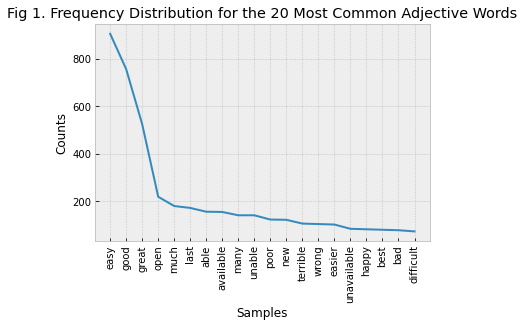

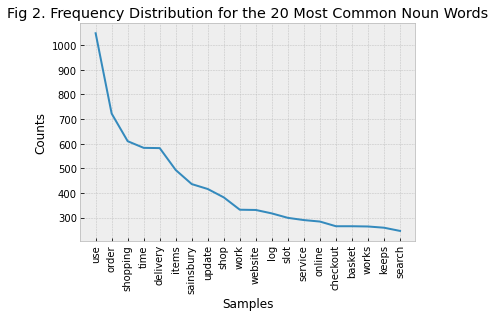

In [17]:
distribution_plot_common_words (fdist_obj, 20, 
                                'Fig 1. Frequency Distribution for the 20 Most Common Adjective Words')
distribution_plot_common_words (fdist_noun, 20, 
                                'Fig 2. Frequency Distribution for the 20 Most Common Noun Words')

# 5. World Cloud Analysis

In [18]:
# Importing Package of Word Cloud

!pip install wordcloud -q

from wordcloud import WordCloud
from collections import Counter

In [19]:
# Creating Database for Score 1, Score 2, and Score 5

df_mobile_apps_review_1 = df_mobile_apps_review[df_mobile_apps_review['score']==1]
df_mobile_apps_review_2 = df_mobile_apps_review[df_mobile_apps_review['score']==2]
df_mobile_apps_review_5 = df_mobile_apps_review[df_mobile_apps_review['score']==5]

In [20]:
# Function to create Word Cloud for Adjective Words

def word_cloud_per_rating_obj(df_mobile_apps_review_number, title_name):
    # Tokenizing
    tagged_reviews_number_tokens = tokenize_type_combined (df_mobile_apps_review_number)
    # Data Cleaning
    tagged_reviews_number_tokens = data_cleaning (tagged_reviews_number_tokens)
    # Post Tagging
    tagged_reviews_number_tokens = tokenize_type_combined_tag (tagged_reviews_number_tokens)
    
    # Filtering Token with Adjectives
    obj_number = []
    obj_number = [word 
             for (word, pos) in tagged_reviews_number_tokens 
             if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS')] 

    # Creating the Wordcloud
    simple_frequencies_dict_number = Counter(obj_number)
    cloud = WordCloud(width=1200, height=400, max_font_size=160,colormap="viridis", background_color = "white").generate_from_frequencies(simple_frequencies_dict_number)
    plt.imshow(cloud, interpolation='bilinear')
    plt.title (title_name, fontsize=12)
    plt.axis('off')

In [21]:
# Function to create Word Cloud for Noun Words

def word_cloud_per_rating_noun (df_mobile_apps_review_number, title_name):
    
    # Tokenizing
    tagged_reviews_number_tokens = tokenize_type_combined (df_mobile_apps_review_number)
    # Data Cleaning
    tagged_reviews_number_tokens = data_cleaning (tagged_reviews_number_tokens)
    # Post Tagging
    tagged_reviews_number_tokens = tokenize_type_combined_tag (tagged_reviews_number_tokens)
    
    # Filtering Token with Nouns
    nouns_number = [] 
    nouns_number = [word 
         for (word, pos) in tagged_reviews_number_tokens
         if (pos == 'NN' or pos == 'NNS')] 

    # Creating the Wordcloud
    simple_frequencies_dict_number = Counter(nouns_number)
    cloud = WordCloud(width=1200, height=400, max_font_size=160,colormap="icefire", background_color = "white").generate_from_frequencies(simple_frequencies_dict_number)
    plt.imshow(cloud, interpolation='bilinear')
    plt.title (title_name, fontsize=12)
    plt.axis('off')

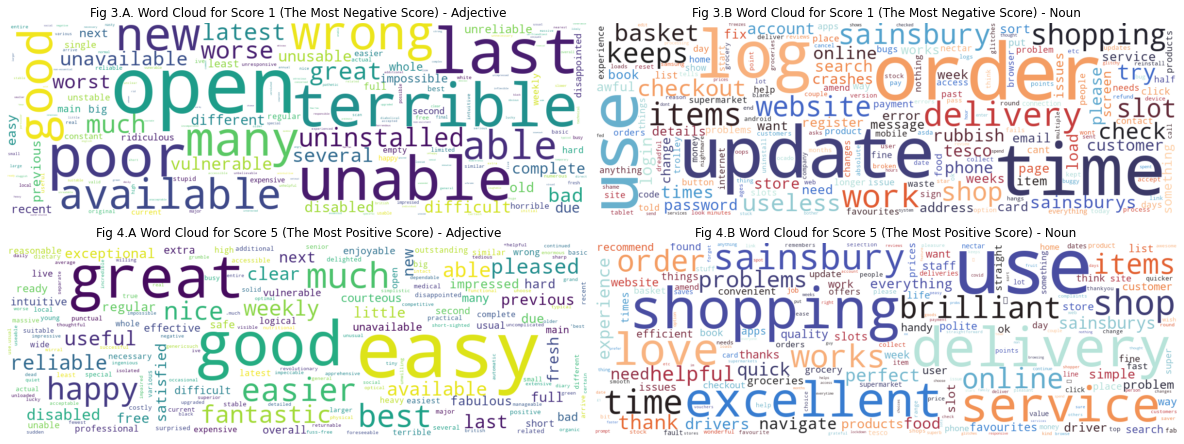

In [22]:
# Word Cloud Analysis for Score 1 and Score 5 - Comparison Based on Adjective and Noun

plt.subplots(2,2,figsize=(20,6))

plt.subplot(2, 2, 1)
word_cloud_per_rating_obj (df_mobile_apps_review_1['content'], 
                           'Fig 3.A. Word Cloud for Score 1 (The Most Negative Score) - Adjective')
plt.subplot(2, 2, 2)
word_cloud_per_rating_noun (df_mobile_apps_review_1['content'], 
                            'Fig 3.B Word Cloud for Score 1 (The Most Negative Score) - Noun')
plt.subplot(2, 2, 3)
word_cloud_per_rating_obj (df_mobile_apps_review_5['content'], 
                           'Fig 4.A Word Cloud for Score 5 (The Most Positive Score) - Adjective')
plt.subplot(2, 2, 4)
word_cloud_per_rating_noun (df_mobile_apps_review_5['content'], 
                            'Fig 4.B Word Cloud for Score 5 (The Most Positive Score) - Noun')

plt.tight_layout(pad=0.1, w_pad=-20, h_pad=1)

# 6. Sentiment Analysis - VADER

Sentiment Analysis is methodology to detect polarity (Positive, Negative, Neutral) within text. In this analysis, researchers used VADER (Valence Aware Dictionary for sEntiment Reasoning) which is a lexicon and rule-based sentiment analysis tool.

In [23]:
!pip install vaderSentiment -q

# Importing the package for Sentiment Analysis
import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [24]:
def sentiment_analysis(data_set_name, content_column, identifier_column):
    res = {}
    for i, row in tqdm (data_set_name.iterrows(), total=len(data_set_name)):
        text = row [content_column]
        myid = row [identifier_column]
        res[myid] = sia.polarity_scores(text)
        
    vaders = pd.DataFrame(res).T
    vaders = vaders.reset_index().rename (columns={'index':'reviewId'})
    vaders = vaders.merge (data_set_name, how='left')

    '''
    positive sentiment: compound >= 0.05
    neural sentiment: (compound > -0.05) and (compound < 0.05)
    negative sentiment: compound <= -0.05
    '''
    
    return vaders

In [25]:
vaders = sentiment_analysis(df_mobile_apps_review, 'content', 'reviewId')

  0%|          | 0/6112 [00:00<?, ?it/s]

In [26]:
# Sentiment Analysis Overview/Statistics
def sentiment_analysis_overview (data_set_name, score_column, pos_sentiment_column, 
                                 neg_sentiment_column, neu_sentiment_column, comp_sentiment_column, title_name):
    
    # Setting Up the Figure
    plt.style.use ('bmh')
    fig, axs = plt.subplots(1,4, figsize=(15,5))
    plt.suptitle (title_name, fontsize=15)
    
    # Creating the Bar Plot for Positive, Negative, Neutral, and Compound Sentiments
    sns.barplot (data=data_set_name, x = score_column, y = pos_sentiment_column, palette="husl", ax = axs[0])
    sns.barplot (data=data_set_name, x = score_column, y = neg_sentiment_column, palette="husl", ax = axs[1])
    sns.barplot (data=data_set_name, x = score_column, y = neu_sentiment_column, palette="husl", ax = axs[2])
    sns.barplot (data=data_set_name, x = score_column, y = comp_sentiment_column, palette="husl", ax = axs[3])

    # Setting Up the Title
    axs[0].set_title ('Postive')
    axs[1].set_title ('Negative')
    axs[2].set_title ('Neutral')
    axs[3].set_title ('Compound')

    plt.tight_layout()
    plt.show()

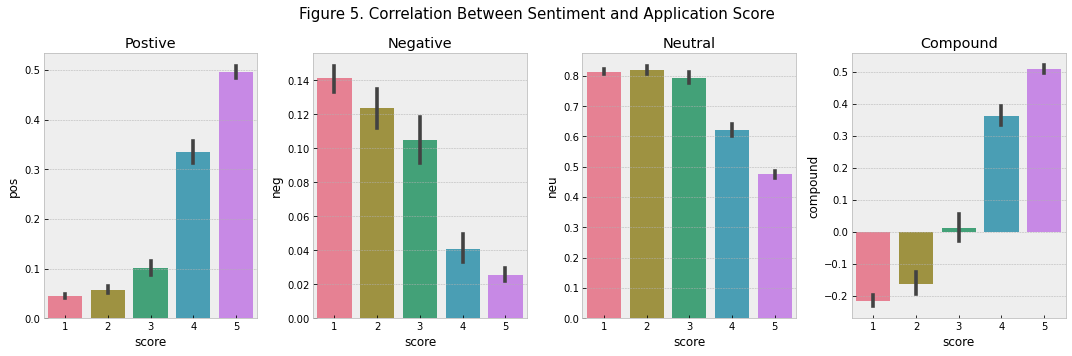

In [27]:
sentiment_analysis_overview(vaders, 'score', 'pos', 'neg', 'neu', 'compound', 
                            'Figure 5. Correlation Between Sentiment and Application Score')

In [28]:
date_point_y=[2018,2018,2019,2020,2021,2021,2022]
date_point_m=[4,7,6,10,6,9,10]
date_point_d=[10,6,8,23,20,10,30]
date_point_v=['Version 1.11.2','Version 2.2.4','Version 2.10.6','Version 2.40.2','Version 2.50.0','Version 2.53.0','Version 3.5.0']

# Use 30% of dataset to visualize the trend of sensition - Rolling Mean
ot = vaders.sample(frac=.3, random_state=1111)
ot.sort_index(inplace=True)
ot['mean'] = ot['compound'].expanding().mean()
ot['rolling'] = ot['compound'].rolling(10).mean()


# Function for Sentiment Analysis Overtime
def sentiment_analysis_overtime(title_name):
    # Setting Up the figure
    fig = plt.figure(figsize=(16.8,5))
    plt.style.use ('bmh')
    plt.suptitle (title_name, fontsize=15)
    ax = fig.add_subplot(111)
    
    # Creating Scatter Plot of Sentiment
    ax.scatter(ot['at'],ot['compound'], label='Review Sentiment', color ='#D6CDA4')
    # Creating Rolling Mean
    ax.plot(ot['at'],ot['rolling'], color ='#1C6758',linewidth = 2, label='Rolling Mean')
    # Creating Expanding mean
    ax.plot(ot['at'],ot['mean'], color='#3D8361',linewidth = 4, label='Expanding Mean')
    
    # Setting up Maximum and Minimum X Axis
    ax.set_xlim([dt.date(2016,12,26),dt.date(2022,11,1)])
    
    # Setting up X and Y Label (Legend)
    ax.set(xlabel='Date', ylabel='Sentiment')
    ax.legend(loc='best')
    
    # Creating a Line for each Version
    for i in range(len(date_point_y)):
        ax.axvline(x=dt.datetime(date_point_y[i],date_point_m[i],date_point_d[i]),linewidth=3, color='r')
        ax.text(x=dt.datetime(date_point_y[i],date_point_m[i],date_point_d[i]), y=0, s=str(date_point_v[i]), rotation=-90, size=15)
     
    fig.tight_layout()
    plt.show()

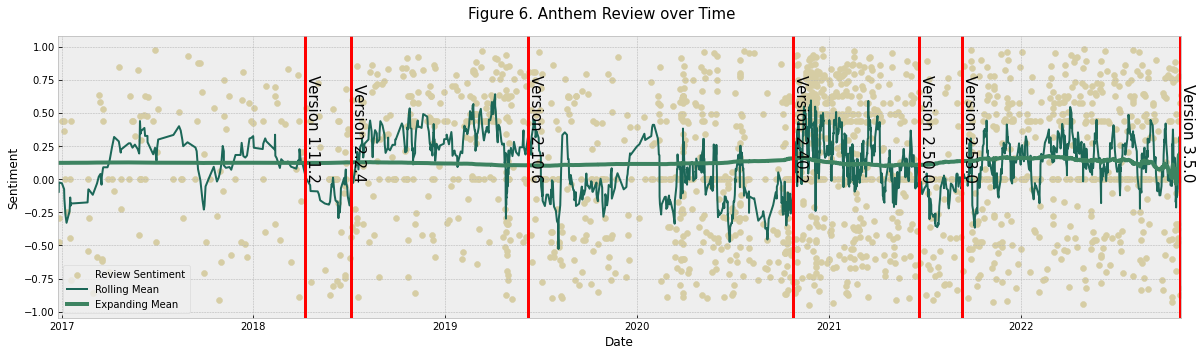

In [29]:
sentiment_analysis_overtime('Figure 6. Anthem Review over Time')

**Explanation:**

From Figure 6, we can see trends sentiment over time. To study what causes sentiment changes, we found six key changes points and marked them with red lines. The sentiment trends of users vary between the periods of application versions. 

- Between Version 2.2.4 and Version 2.10.6, Version 2.40.2 and Version 2.50.0, the user sentiment was more positive relative to the previous version.  It could be that the company has improved the functionality of the mobile apps.
- In the range of Version 2.10.6 to Version 2.40.2 and Version 2.50 to Version 2.53, negative sentiment is stronger.
- After Version 3.0, sentiment is quite stable (sometimes positive and sometimes negative).

In order to understand the emotional differences between different version intervals, we generated word cloud maps of adjectives and nouns in each time period for comparison.

In [30]:
# Function to Create Word Cloud based on Region (Mobile Apps Version)

def CreateRegionWordCloud(date_region,openday,closeday,titlename_obj,titlename_noun):
    
    # In order to know the start and the end of Version, we extract based on the first and last review's 'Created Version Date' on Data Frame
    # Condition 1 is for Start Date and Condition 2 is for End Date of each version
    con1=ot['at']>=open_day
    con2=ot['at']<close_day
    if date_region == 'positive':
        con3=ot['compound']>0
    if date_region == 'negative':
        con3=ot['compound']<0
    
    # Creating Wordcloud Side by Side for Adjectives and Noun
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    word_cloud_per_rating_obj (ot[con1&con2&con3]['content'], titlename_obj+str('- Adjectives'))
    plt.subplot(122)
    word_cloud_per_rating_noun (ot[con1&con2&con3]['content'], titlename_noun+str('- Nouns'))  

- For the period from version 2.10.6 to version 2.40.2, users frequently discussed the themes of checkout, delivery, time, and so on. They thought Sainsbury's APP is vulnerable in these aspects, and expressed that the version in this period is worse than that before. Also, users pointed out problems with software installation and account logins
- For several recently updated versions, people paid more attention on the favourites function, points and products. Overall, they reported a consistent stream of favourable feelings, but a tiny percentage of customers complained about issues like the latest version's inability to install.

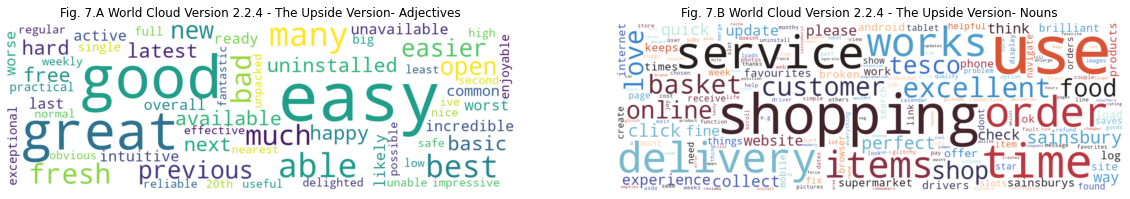

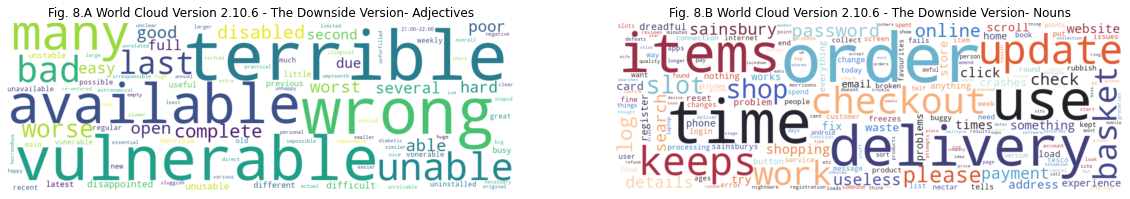

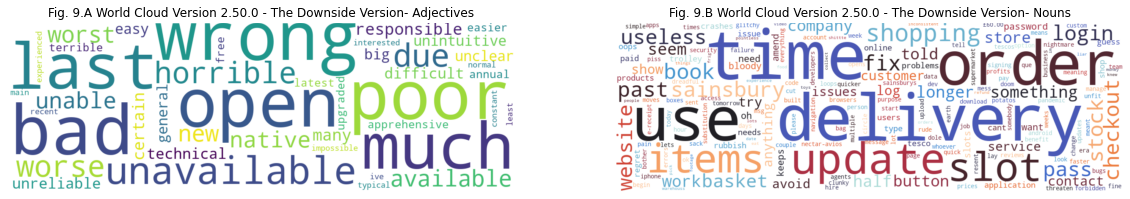

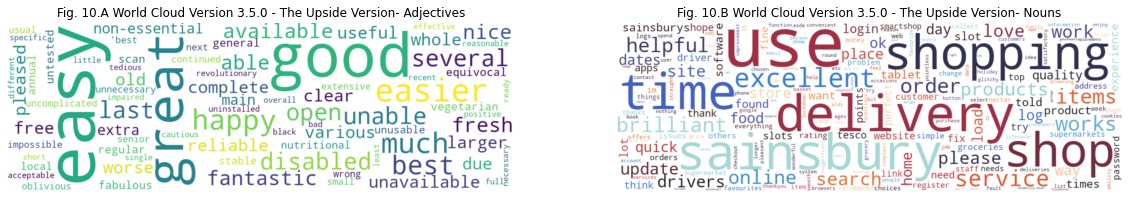

In [31]:
for i in range(len(date_point_y)-1):
    open_day=dt.datetime(date_point_y[i],date_point_m[i],date_point_d[i])
    close_day=dt.datetime(date_point_y[i+1],date_point_m[i+1],date_point_d[i+1])
 
    if i == 1:
        date_region = 'positive'
        CreateRegionWordCloud(date_region,open_day,close_day,'Fig. 7.A World Cloud Version 2.2.4 - The Upside Version','Fig. 7.B World Cloud Version 2.2.4 - The Upside Version')
    if i == 2:
        date_region = 'negative'
        CreateRegionWordCloud(date_region,open_day,close_day,'Fig. 8.A World Cloud Version 2.10.6 - The Downside Version','Fig. 8.B World Cloud Version 2.10.6 - The Downside Version')  
    if i == 4:
        date_region = 'negative'
        CreateRegionWordCloud(date_region,open_day,close_day,'Fig. 9.A World Cloud Version 2.50.0 - The Downside Version','Fig. 9.B World Cloud Version 2.50.0 - The Downside Version')
    if i == 5:
        date_region = 'positive'
        CreateRegionWordCloud(date_region,open_day,close_day,'Fig. 10.A World Cloud Version 3.5.0 - The Upside Version','Fig. 10.B World Cloud Version 3.5.0 - The Upside Version')

# 8. Topic Modelling - Latent Dirichlet Allocation

Topic Modelling is used to identify the major concepts of the texts. In this case, Latent Dirichlet Allocation (LDA), Unsupervised Learning, is used to identified the most likely topics.

In [32]:
!pip install -U pip setuptools wheel -q
!pip install -U spacy -q # or pip3
!python -m spacy download en_core_web_sm -q # or python3
import spacy

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [33]:
# Import Additional Package

# Gensim
!pip install --upgrade gensim -q

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import re

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import matplotlib.colors as mcolors

In [34]:
# Creating Database for Low Score (Score 1 and Score 2)
df_mobile_apps_review_1_2 = pd.concat([df_mobile_apps_review_1, df_mobile_apps_review_2])

In [35]:
# Sent to Words Function
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # removing emails
        sent = re.sub('\s+', ' ', sent)  # removing newline chars
        sent = re.sub("\'", "", sent)  # removing single quotes 
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) # deacc=True removes punctuations 
        yield(sent) 

In [36]:
# Removing Words Function
def remove_words(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in remove_these] for doc in texts]

In [37]:
# Creating Data Words to be used for analysis
data = df_mobile_apps_review_1_2.content.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_words(data_words)

In [38]:
# Creating Bi-Gram and Tri-Gram

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [39]:
# Function to Process Words into Bi-Gram and Tri-Gram

import gensim, spacy, logging, warnings

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['senter'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    # Removing Stopwords After Lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [40]:
final_data_used = process_words(data_words) 

In [41]:
def create_LDA_model (data_to_used, number_of_topics):
    # Creating Dictionary
    id2word = corpora.Dictionary(data_to_used)

    # Creating Corpus: Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data_to_used]

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=number_of_topics, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=10,
                                               passes=10,
                                               alpha='symmetric',
                                               iterations=100,
                                               per_word_topics=True)
    return lda_model

In [42]:
lda_model = create_LDA_model (final_data_used, 3)

In [43]:
def histogram_LDA (lda_model_used, data_used, title_name, plot_size_x, plot_size_y):
    from collections import Counter
    topics = lda_model_used.show_topics(formatted=False)
    data_flat = [w for w_list in data_used for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    # Creating Data Frame
    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    # Setting Up the Sub Plot - Adjust Based on Total Topic Clustered in LDA MOdel
    fig, axes = plt.subplots(plot_size_x, plot_size_y, figsize=(16,5), sharey=True, dpi=160)
    
    # Setting Up the Color
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    
    # Setting Up the Graph
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.1); ax.set_ylim(0, 700)
        ax.set_title('Topic: ' + str(i + 1), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    # Setting Up The Figure
    fig.tight_layout(w_pad=2)    
    fig.suptitle(title_name, fontsize=15, y=1.05)    
    plt.show()

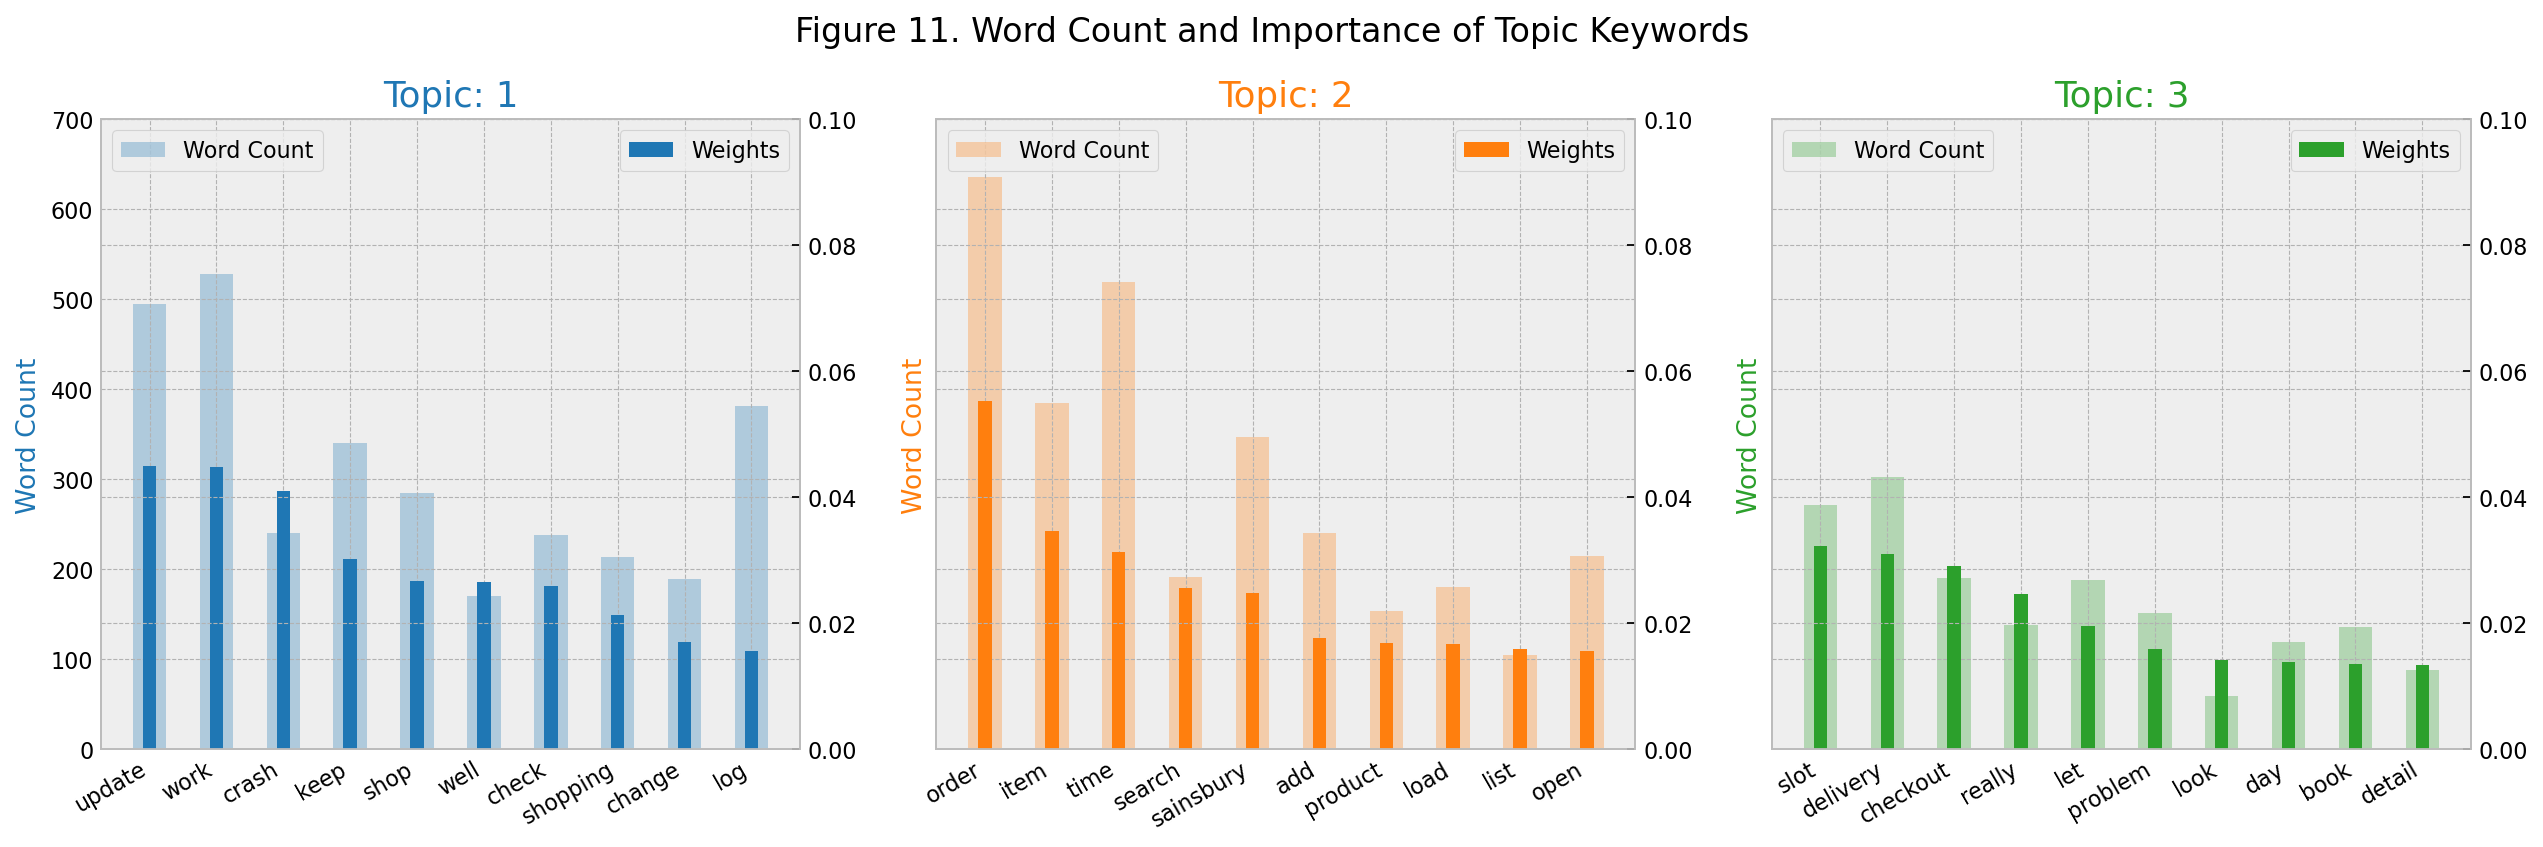

In [44]:
histogram_LDA (lda_model, final_data_used, 'Figure 11. Word Count and Importance of Topic Keywords', 1, 3)

# 8. Trigram Analysis

In [45]:
# Tokenizing Data per sentence/row and Remove for selected words based on 'Remove These' Criteria

def tokenize_type_persentence (data_set_name):
    # Removing All Criteria from Texts
    from gensim.utils import simple_preprocess
    return [[word for word in simple_preprocess(str(doc)) 
        if word not in remove_these] for doc in data_set_name]

In [46]:
# Creating Data Frame and rejoin token for LDA and N-Gram analysis

n_gram_score12_data = pd.DataFrame (tokenize_type_persentence (df_mobile_apps_review_1_2['content']))
n_gram_score12_data['Content'] = n_gram_score12_data[n_gram_score12_data.columns[1:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [47]:
# N-Gram Analysis Function

from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram (data_set_name, n = None, ngram = 1, words_stop = stopwords.words('english')):
    
    # Vectorizing
    vec = CountVectorizer(stop_words = words_stop, ngram_range=(ngram,ngram)).fit(data_set_name)
    bag_of_words = vec.transform(data_set_name) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

In [48]:
n_gram_words = top_n_ngram(n_gram_score12_data['Content'], 20,ngram = 3, 
                           words_stop = stopwords.words('english'))

In [49]:
# N-Freq-Diagram

def distribution_plot_common_words_ngram (n_grams_data, title_name):
    plt.style.use ('bmh')
    fig = plt.figure(figsize=(17,10))
    plt.title (title_name)
    dataframe_ngram = pd.DataFrame(n_grams_data, columns = ['Gram_Name' , 'count'])
    dataframe_ngram.groupby('Gram_Name').sum()['count'].sort_values(ascending=True).plot(kind='barh', color = '#00ABB3')

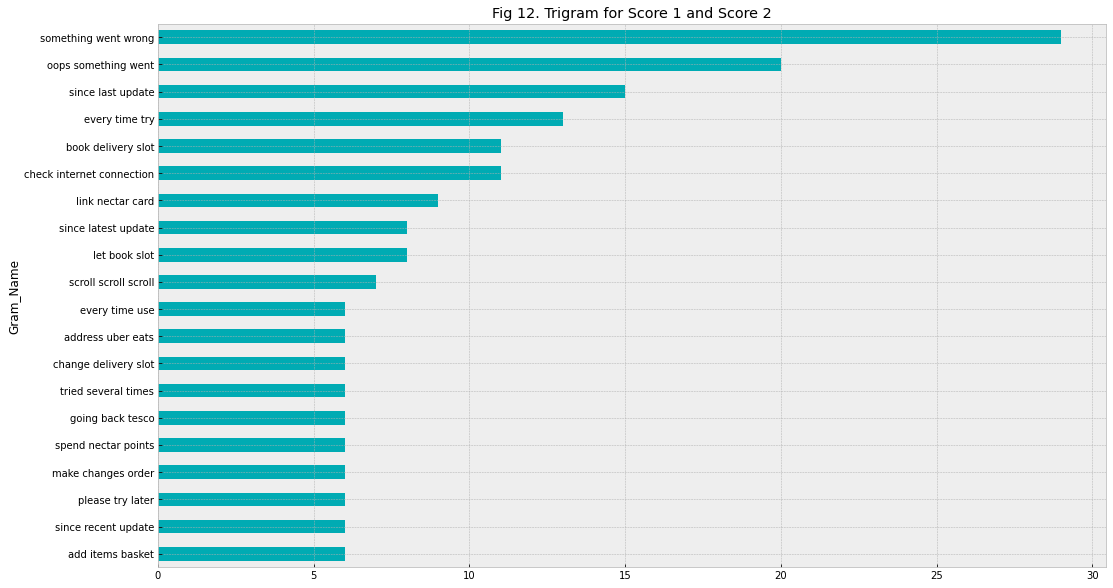

In [52]:
distribution_plot_common_words_ngram (n_gram_words, 'Fig 12. Trigram for Score 1 and Score 2')

# References

- Barnett, M. (2022) ‘regex 2022.10.31’, Python Package Index, 31 October. Available at: https://pypi.org/project/regex/ (Accessed: 5 November 2022).
- D. Hunter, J. and Droettboom, M. (2022) ‘Matplotlib 3.6.2’, Python Package Index, 3 November. Available at: https://pypi.org/project/matplotlib/ (Accessed: 5 November 2022).
- E. Oliphant, T. and et al. (2022) ‘numpy 1.23.4’, Python Package Index, 12 October. Available at: https://pypi.org/project/numpy/ (Accessed: 5 November 2022).
- Explosion (2022) ‘Industrial-strength NLP - spacy 3.4.2’, Python Package Index, 20 October. Available at: https://pypi.org/project/spacy/ (Accessed: 5 November 2022).
- Greenfeld, D. (2013) ‘Strings 0.1.2’, Python Package Index, 12 July. Available at: https://pypi.org/project/strings/ (Accessed: 5 November 2022).
- Hutto, C. (2020) ‘VADER (Valence Aware Dictionary and sEntiment Reasoner) - vaderSentiment 3.3.2’, Python Package Index, 22 May. Available at: https://pypi.org/project/vaderSentiment/ (Accessed: 5 November 2022).
- Mingyu (2022) ‘Google Play Scraper - google-play-scraper 1.2.2’, 19 August. Available at: https://pypi.org/project/google-play-scraper/ (Accessed: 5 November 2022).
- Morton, R. (2020) ‘collection 0.1.6’, Python Package Index, 8 August. Available at: https://pypi.org/project/collection/ (Accessed: 5 November 2022).
- Mueller, A. (2022a) ‘scikit-learn’, Python Package Index, 26 October. Available at: https://pypi.org/project/scikit-learn/ (Accessed: 5 November 2022).
- Mueller, A. (2022b) ‘wordcloud 1.8.2.2’, Python Package Index, 27 June. Available at: https://pypi.org/project/wordcloud/ (Accessed: 5 November 2022).
- NLTK (2022) ‘The Natural Language Toolkit (NLTK) - nltk 3.7’, Python Package Index, 9 February. Available at: https://pypi.org/project/nltk/ (Accessed: 5 November 2022).
- Rehurek, R. (2022) ‘gensim 4.2.0’, Python Package Index, 1 May. Available at: https://pypi.org/project/gensim/ (Accessed: 5 November 2022).
- The Pandas Development Team (2022) ‘pandas: powerful Python data analysis toolkit - pandas 1.5.1’, Python Package Index, 19 October. Available at: https://pypi.org/project/pandas/ (Accessed: 5 November 2022).
- TQDM Developer (2022) ‘tqdm 4.64.1’, Python Package Index, 3 September. Available at: https://pypi.org/project/tqdm/ (Accessed: 5 November 2022).
- Waskom, M. (2022) ‘Seaborn: statistical data visualization - seaborn 0.12.1’, Python Package Index, 18 October. Available at: https://pypi.org/project/seaborn/ (Accessed: 5 November 2022).
- Zope Foundation and Contributors (2022) ‘DateTime 4.7’, Python Package Index, 14 September. Available at: https://pypi.org/project/DateTime/ (Accessed: 5 November 2022).